In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('trollers.csv')

# Replace -1 with NaN for the target variable
data['is_fishing'] = data['is_fishing'].replace(-1, np.nan)

# Drop rows with NaN in 'is_fishing' (you can also choose to impute)
data = data.dropna(subset=['is_fishing'])

# Convert 'is_fishing' to binary (e.g., 0 for not fishing, 1 for fishing)
data['is_fishing'] = np.where(data['is_fishing'] > 0, 1, 0)

# Select features for the model
features = data[['distance_from_shore', 'distance_from_port', 'speed', 'course', 'lat', 'lon']]
target = data['is_fishing']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Model training using RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prediction and evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.9443500424808836
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1436
           1       0.95      0.91      0.93       918

    accuracy                           0.94      2354
   macro avg       0.94      0.94      0.94      2354
weighted avg       0.94      0.94      0.94      2354



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Load the dataset
data = pd.read_csv('trollers.csv')

# Replace -1 with NaN for the target variable
data['is_fishing'] = data['is_fishing'].replace(-1, np.nan)

# Drop rows with NaN in 'is_fishing'
data = data.dropna(subset=['is_fishing'])

# Convert 'is_fishing' to binary (e.g., 0 for not fishing, 1 for fishing)
data['is_fishing'] = np.where(data['is_fishing'] > 0, 1, 0)

# Select features for the model
features = data[['distance_from_shore', 'distance_from_port', 'speed', 'course', 'lat', 'lon']]
target = data['is_fishing']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Define RandomForest model and hyperparameters for tuning
rf_model = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model after tuning
best_model = grid_search.best_estimator_

# Prediction and evaluation
y_pred = best_model.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Feature importance
feature_importances = pd.DataFrame(best_model.feature_importances_, index=features.columns, columns=['Importance']).sort_values('Importance', ascending=False)
print("\nFeature Importances:\n", feature_importances)

# Save the trained model
joblib.dump(best_model, 'fishing_rf_model.pkl')
print("Model saved as 'fishing_rf_model.pkl'")

Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Model Accuracy: 0.9384027187765506
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1436
           1       0.94      0.90      0.92       918

    accuracy                           0.94      2354
   macro avg       0.94      0.93      0.93      2354
weighted avg       0.94      0.94      0.94      2354


Feature Importances:
                      Importance
distance_from_port     0.233636
speed                  0.212409
lat                    0.192969
lon                    0.184772
distance_from_shore    0.121992
course                 0.054223
Model saved as 'fishing_rf_model.pkl'


## Testing on Multiple Classification Models

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('trollers.csv')

# Replace -1 with NaN for the target variable
data['is_fishing'] = data['is_fishing'].replace(-1, np.nan)

# Drop rows with NaN in 'is_fishing'
data = data.dropna(subset=['is_fishing'])

# Convert 'is_fishing' to binary (e.g., 0 for not fishing, 1 for fishing)
data['is_fishing'] = np.where(data['is_fishing'] > 0, 1, 0)

# Select features for the model
features = data[['distance_from_shore', 'distance_from_port', 'speed', 'course', 'lat', 'lon']]
target = data['is_fishing']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Initialize classifiers
classifiers = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Train, predict, and evaluate each classifier
for name, model in classifiers.items():
    print(f"\n{name} Results:")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))



RandomForest Results:
Accuracy: 0.9413763806287171
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1436
           1       0.94      0.91      0.92       918

    accuracy                           0.94      2354
   macro avg       0.94      0.94      0.94      2354
weighted avg       0.94      0.94      0.94      2354


LogisticRegression Results:
Accuracy: 0.8283772302463891
              precision    recall  f1-score   support

           0       0.88      0.83      0.85      1436
           1       0.76      0.83      0.79       918

    accuracy                           0.83      2354
   macro avg       0.82      0.83      0.82      2354
weighted avg       0.83      0.83      0.83      2354


SVM Results:
Accuracy: 0.826677994902294
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1436
           1       0.80      0.74      0.77       918

    accuracy                  

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assume the model has been trained as in previous examples
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# Example single data point (replace these values with your specific data point)
single_data = {
    'distance_from_shore': 999.9754638672,         # Example value
    'distance_from_port': 1414.1788330078,   # Example value
    'speed': 0,                     # Example value
    'course': 248.1999969482,                  # Example value
    'lat': 57.1096343993999,               # Example value
    'lon': 12.2415819168                # Example value
}

# Convert the dictionary to a pandas DataFrame
single_df = pd.DataFrame([single_data])

# Predict using the trained model
prediction = model.predict(single_df)

# Output the prediction result
if prediction[0] == 1:
    print("Fishing activity detected.")
else:
    print("No fishing activity detected.")


No fishing activity detected.


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Assume the model has been trained as in previous examples
# model = RandomForestClassifier()
# model.fit(X_train, y_train)

# Example data point for fishing activity detection
data_point_1 = {
    'distance_from_shore': 999.9754638672,   # Example value
    'distance_from_port': 1414.1788330078,   # Example value
    'speed': 0,                              # Example value
    'course': 248.1999969482,                # Example value
    'lat': 57.1096343993999,                 # Example value
    'lon': 12.2415819168                     # Example value
}

# Another example data point for illegal fishing detection
# (Using hypothetical conditions where illegal activity is more likely closer to shore with higher speed)
data_point_2 = {
    'distance_from_shore': 50.0,             # Close to shore, may indicate illegal activity
    'distance_from_port': 500.0,             # Example value
    'speed': 12.5,                           # Speed threshold for fishing activity
    'course': 180.0,                         # Example course
    'lat': 35.123456,                        # Example latitude
    'lon': -120.654321                       # Example longitude
}

# Convert both data points to a pandas DataFrame
test_df = pd.DataFrame([data_point_1, data_point_2])

# Predict fishing activity for both data points
predictions = model.predict(test_df)

# Output the prediction results with illegal fishing logic (example criteria)
for i, prediction in enumerate(predictions):
    if prediction == 1:
        if test_df.iloc[i]['distance_from_shore'] < 100 and test_df.iloc[i]['speed'] > 10:
            print(f"Data Point {i + 1}: Illegal fishing activity detected.")
        else:
            print(f"Data Point {i + 1}: Fishing activity detected.")
    else:
        print(f"Data Point {i + 1}: No fishing activity detected.")

Data Point 1: No fishing activity detected.
Data Point 2: No fishing activity detected.


<ipython-input-11-5f8631305142>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_test, x='Actual', palette='viridis', alpha=0.6, label='Actual')
<ipython-input-11-5f8631305142>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=X_test, x='Predicted', palette='Set2', alpha=0.6, label='Predicted')


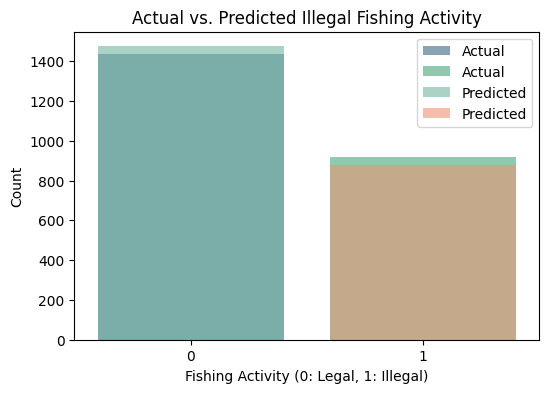

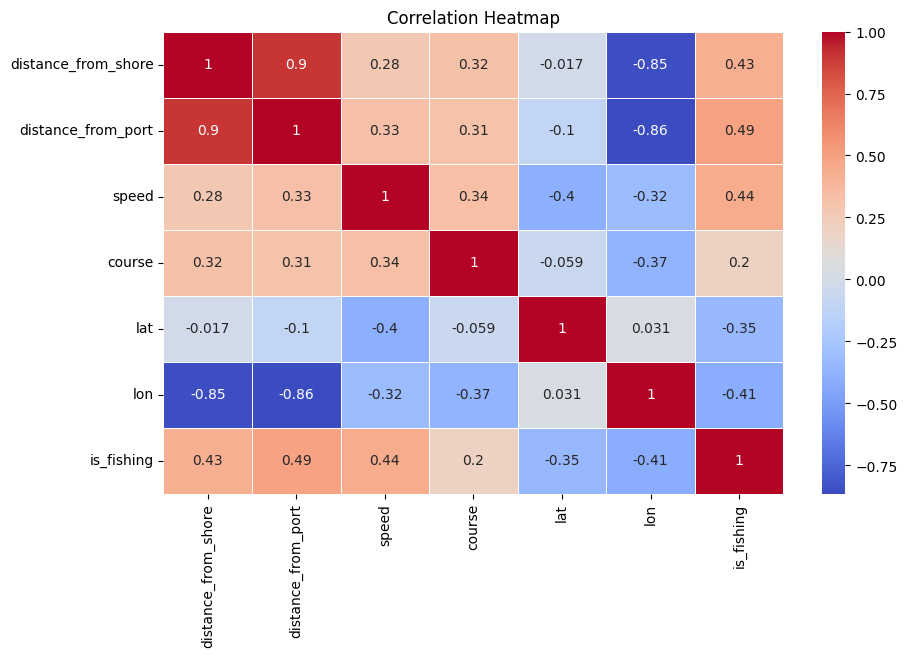

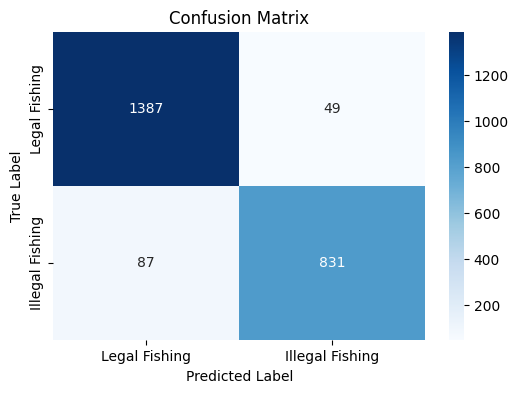

<ipython-input-11-5f8631305142>:74: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', color='gray')


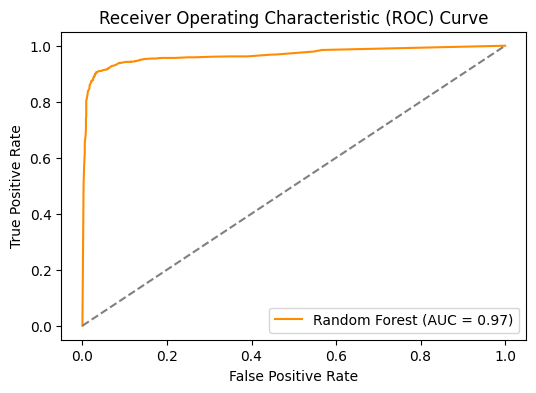

<ipython-input-11-5f8631305142>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances, y=features_list, palette='viridis')


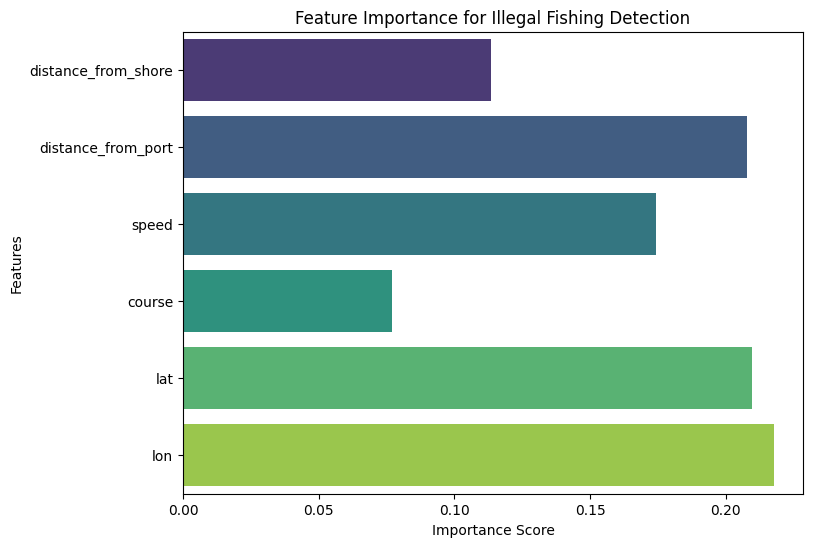

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the dataset
data = pd.read_csv('trollers.csv')

# Replace -1 with NaN for the target variable
data['is_fishing'] = data['is_fishing'].replace(-1, np.nan)

# Drop rows with NaN in 'is_fishing'
data = data.dropna(subset=['is_fishing'])

# Convert 'is_fishing' to binary (0: legal fishing, 1: illegal fishing)
data['is_fishing'] = np.where(data['is_fishing'] > 0, 1, 0)

# Select features and target
features = data[['distance_from_shore', 'distance_from_port', 'speed', 'course', 'lat', 'lon']]
target = data['is_fishing']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # For ROC Curve

# Add predictions to the test set
X_test['Actual'] = y_test.values
X_test['Predicted'] = y_pred

# Visualization 1: Actual vs. Predicted Illegal Fishing Activity
plt.figure(figsize=(6, 4))
sns.countplot(data=X_test, x='Actual', palette='viridis', alpha=0.6, label='Actual')
sns.countplot(data=X_test, x='Predicted', palette='Set2', alpha=0.6, label='Predicted')
plt.title('Actual vs. Predicted Illegal Fishing Activity')
plt.xlabel('Fishing Activity (0: Legal, 1: Illegal)')
plt.ylabel('Count')
plt.legend()
plt.show()

# Visualization 3: Correlation Heatmap
plt.figure(figsize=(10, 6))
corr = data[['distance_from_shore', 'distance_from_port', 'speed', 'course', 'lat', 'lon', 'is_fishing']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Visualization 3: Confusion Matrix for Illegal Fishing Detection
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Legal Fishing', 'Illegal Fishing'],
            yticklabels=['Legal Fishing', 'Illegal Fishing'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Visualization 4: ROC Curve for Illegal Fishing Detection
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], 'k--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Feature Importance Visualization
feature_importances = model.feature_importances_
features_list = features.columns
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=features_list, palette='viridis')
plt.title('Feature Importance for Illegal Fishing Detection')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()